In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Embedding,MaxPooling1D,Conv1D,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input

In [3]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model

In [12]:
df = pd.read_csv('weatherAUS.csv')

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [15]:
df['Date']=df['Date'].str.replace('-','').apply(int)

In [17]:
pd.DataFrame(df.isnull().sum()/df.shape[0]).T

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,0.0,0.010209,0.008669,0.022419,0.431665,0.480098,0.070989,0.070555,0.072639,...,0.018246,0.030984,0.103568,0.103314,0.384216,0.408071,0.012148,0.024811,0.022419,0.02246


In [19]:
df.dtypes

Date               int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 


def encode_categorical(ds):
    for c in ds.columns:
        if not(is_numeric_dtype(ds[c])) :
            ds[c] = encoder.fit_transform(ds[c])

encode_categorical(df)



In [24]:
df.fillna(df.mean(),inplace=True)

In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20081201,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,20081202,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,20081203,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,20081204,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,20081205,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [26]:
mapper = {0 : "NO", 1 : "YES"}

In [36]:
X,Y = df.drop(columns=['RainTomorrow']),df['RainTomorrow']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)


In [56]:
i = Input(shape=x_train[0].shape)

x = Dense(32,activation='relu')(i)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(1,activation = 'sigmoid')(x)

model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.00001),
        loss='binary_crossentropy',  
        metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
r = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
3637/3637 [==============================] - 14s 4ms/step - loss: 0.6271 - accuracy: 0.6628 - val_loss: 0.4519 - val_accuracy: 0.7885
Epoch 2/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.5176 - accuracy: 0.7475 - val_loss: 0.4223 - val_accuracy: 0.8010
Epoch 3/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.4903 - accuracy: 0.7677 - val_loss: 0.4110 - val_accuracy: 0.8043
Epoch 4/10
3637/3637 [==============================] - 14s 4ms/step - loss: 0.4766 - accuracy: 0.7749 - val_loss: 0.4033 - val_accuracy: 0.8079
Epoch 5/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.4710 - accuracy: 0.7771 - val_loss: 0.3979 - val_accuracy: 0.8077
Epoch 6/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.4618 - accuracy: 0.7785 - val_loss: 0.3944 - val_accuracy: 0.8093
Epoch 7/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.4566 - accuracy: 0.7822 - val_loss: 0.3887 - val_ac

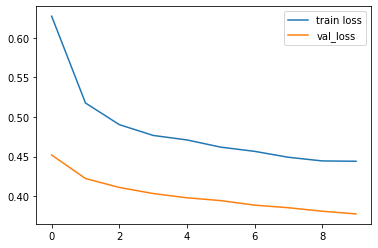

In [58]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')

plt.legend()

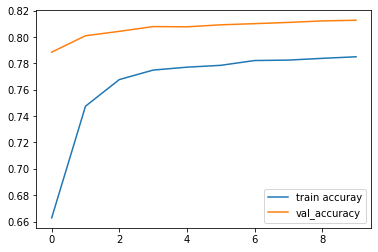

In [59]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()